# **Final Project - Part B**

IST340 Knowledge Discovery and Data Mining

Group 1: **Yuri Yu**, **Irma Covarrubias**, **Patrick Watkins**

## Load necessary libraries

In [151]:
import re
import pandas as pd 
pd.set_option('display.max_columns', None) 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## Working directory

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
# File path set and defined to Google Drive to access all the datasets.
file_path = '/content/drive/MyDrive/IST340_Spring_Lab/'

# Data Understanding Phase

## Load the initial and collected DMABASE dataset

In [154]:
df = pd.read_csv(file_path + 'DMABASE.csv')
display(df.head(10), df.shape, df.dtypes)

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
0,"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,66,1,30,29,14,American,East,C,446,33,20,NaN,NaN
1,"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,835,69,321,414,375,National,West,C,632,43,10,475.0,6.163315
2,"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,457,63,224,266,263,American,West,1B,880,82,14,480.0,6.173786
3,"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,1575,225,828,838,354,National,East,RF,200,11,3,500.0,6.214608
4,"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,101,12,48,46,33,National,East,1B,805,40,4,91.5,4.516339
5,"Griffin, Alfredo",Oakland,594,169,4,74,51,35,11,4408,1133,19,501,336,194,American,West,SS,282,421,25,750.0,6.620073
6,"Newman, Al",Montreal,185,37,1,23,8,21,2,214,42,1,30,9,24,National,East,2B,76,127,7,70.0,4.248495
7,"Salazar, Argenis",KansasCity,298,73,0,24,24,7,3,509,108,0,41,37,12,American,West,SS,121,283,9,100.0,4.605170
8,"Thomas, Andres",Atlanta,323,81,6,26,32,8,2,341,86,6,32,34,8,National,West,SS,143,290,19,75.0,4.317488
9,"Thornton, Andre",Cleveland,401,92,17,49,66,65,13,5206,1332,253,784,890,866,American,East,DH,0,0,0,1100.0,7.003065


(322, 23)

name         object
team         object
no_atbat      int64
no_hits       int64
no_home       int64
no_runs       int64
no_rbi        int64
no_bb         int64
yr_major      int64
cr_atbat      int64
cr_hits       int64
cr_home       int64
cr_runs       int64
cr_rbi        int64
cr_bb         int64
league       object
division     object
position     object
no_outs       int64
no_assts      int64
no_error      int64
salary      float64
logsalar    float64
dtype: object

## Describe the DMABASE dataset

In [155]:
# Create a metadata function that shows and details a description of an input dataframe
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
    
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata

In [156]:
# Describe DMABASE dataset usng metadata function
display(metadata(df))

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,name,object,0,0.00,322,100.00,NaN,NaN,NaN
1,team,object,0,0.00,24,7.45,NaN,NaN,NaN
2,no_atbat,int64,0,0.00,246,76.40,127.000000,687.000000,143.595835
3,no_hits,int64,0,0.00,136,42.24,31.000000,238.000000,44.179509
4,no_home,int64,0,0.00,37,11.49,0.000000,40.000000,8.698770
5,no_runs,int64,0,0.00,91,28.26,12.000000,130.000000,25.057366
6,no_rbi,int64,0,0.00,100,31.06,8.000000,121.000000,25.501162
7,no_bb,int64,0,0.00,85,26.40,3.000000,105.000000,21.095941
8,yr_major,int64,0,0.00,22,6.83,1.000000,24.000000,4.969707
9,cr_atbat,int64,0,0.00,315,97.83,166.000000,14053.000000,2328.479167


In [157]:
# Load the descriptive stats of the interval variables of the dataset
df.describe()

,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,no_outs,no_assts,no_error,salary,logsalar
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000,263.000000
mean,390.074534,103.397516,11.102484,52.217391,49.372671,39.857143,7.680124,2763.077640,747.686335,74.090062,374.285714,347.614907,273.394410,288.993789,106.916149,8.040373,535.925882,5.927222
std,143.595835,44.179509,8.698770,25.057366,25.501162,21.095941,4.969707,2328.479167,654.787619,90.065127,336.425038,338.790345,273.625372,280.656673,136.852454,6.368359,451.118681,0.889192
min,127.000000,31.000000,0.000000,12.000000,8.000000,3.000000,1.000000,166.000000,34.000000,0.000000,18.000000,9.000000,8.000000,0.000000,0.000000,0.000000,67.500000,4.212128
25%,272.000000,68.000000,4.000000,32.000000,29.000000,22.000000,4.000000,911.250000,227.250000,16.000000,106.250000,98.250000,76.000000,109.250000,7.000000,3.000000,190.000000,5.247024
50%,390.500000,98.500000,8.500000,48.000000,45.000000,35.500000,6.000000,2065.000000,552.000000,40.000000,266.000000,250.000000,178.500000,212.000000,39.500000,6.000000,425.000000,6.052089
75%,512.750000,137.750000,16.000000,70.000000,65.000000,54.000000,11.000000,4068.500000,1095.750000,95.500000,556.500000,461.000000,370.750000,325.000000,166.000000,11.000000,750.000000,6.620073
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000,7.807917


1. Since there are 322 records and 322 different names, NAME is likely a unique id, so we will most likely have to drop this column because it is useless for our analysis.
2. The dataset has 322 records and 23 variables. There are 5 categorical columns and 18 interval column.
3. Since we have both a salary and logsalar (which is a log of the salary column) variables, we can drop salary and just keep the logsalar variable.
3. 18% of the logsalar variable is missing, so these values will need to be inputed.
4. What is the timeline for this? Does career stats include 1986 stats as well? ***5/1/2023 update***: Per the business, the timeline is predicting logsalar for 1987. The 1986 stats and the career stats are separated; thus, 1986 stats are not included in the career stats, and they are not supposed to be combined. Also, the dependent variables do not have data from 1987.
5. What derived data can we use?  ***5/1/2023 update***: Per the business, stats such as OB% and Bating AVG could be some derived variables to use if data transformations are needed. No additional statistics need to be added to the data set.
6. Because we have data from 1986 and overall career, we can expect some highly correlated variables.
7. Some variables have some really high values, so we might have to consider binning or scaling them.

## Correlation Analysis

<ipython-input-158-cc7d4a32244c>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(df_correlation[df_columns].corr(),


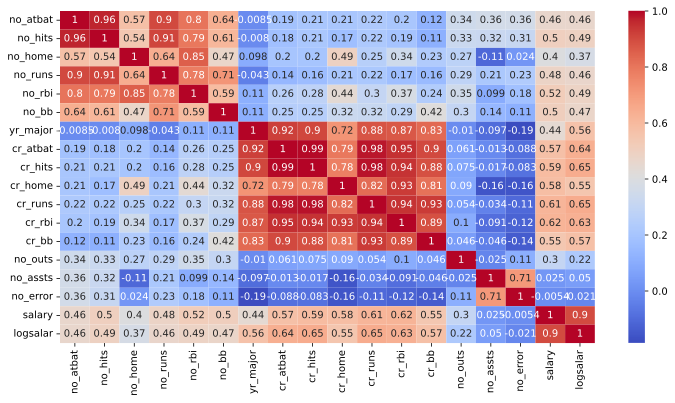

In [158]:
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

df_correlation = df
df_columns = list(df.columns)
plt.figure(figsize=(12,6))
g = sns.heatmap(df_correlation[df_columns].corr(),
                annot=True, 
                cmap = "coolwarm")

We have some highly correlated variables here:
*   no_hits is highly correlated with no_atbats, no_runs, and no_rbi
*   no_home is highly correlated with no_rbi
*   no_runs is highly correlated with no_atbats, no_rbi, and no_bb
*   no_rbi is highly correlated with no_hits, no_home
*   Career stats and yr_major are all highly correlated with each other
*   Salary and logsalar are highly correlated with each other, but Salary can be dropped since we have the logsalar, so we won't have to worry about this.

Between the 1986 stats and careers stats, here are some possible data transformations:

1. **On-base percentage (OBP)** is a baseball statistic that measures a player's ability to reach base safely (excluding fielding errors or other mistakes by the defensive team). It is calculated by dividing the sum of a player's hits, walks, and hit-by-pitches by the sum of their at-bats, walks, hit-by-pitches, and sacrifice flies. The formula for OBP is:

OBP = (Hits + Walks + Hit-by-Pitches) / (At-Bats + Walks + Hit-by-Pitches + Sacrifice Flies)

where:

Hits: the number of times a batter hits the ball safely and reaches base.
Walks: the number of times a batter is awarded first base by taking four balls outside the strike zone.
Hit-by-Pitches: the number of times a batter is struck by a pitch and awarded first base.
At-Bats: the number of times a batter completes a turn at bat (excluding walks, hit-by-pitches, sacrifices, and catcher's interference).
Sacrifice Flies: the number of times a batter hits a fly ball that results in a run being scored or a baserunner advancing, and the batter is subsequently out.
By calculating a player's OBP, we can evaluate how often a player gets on base relative to the number of opportunities they have had to do so.

2. **Batting average** is a baseball statistic that measures a player's performance at bat. It is calculated by dividing the number of hits a player gets by the number of at-bats they have. The formula for batting average is:

Batting Average = Hits / At-Bats

where:

Hits: the number of times a batter hits the ball safely and reaches base.
At-Bats: the number of times a batter completes a turn at bat (excluding walks, hit-by-pitches, sacrifices, and catcher's interference).
By calculating a player's batting average, we can evaluate how frequently a player gets a hit when they come to bat. It is often used as a measure of a player's overall hitting ability, although it has been criticized for not taking into account walks, which can also be valuable offensive contributions.

## Data Exploration

In [159]:
# Create a function that will perform exploratory data analysis on a specified column in a DataFrame, displaying basic statistics and visualizations.
def data_exploration(df, column):
    col_type = df[column].dtype

    if col_type == 'object' or col_type == 'category': 
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        if unique_values < 10:   
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=column)
            plt.title(f"Bar chart of {column}") # Bar plot
            plt.show()
        else:
            bins_num = df[column].nunique()
            sns.histplot(data=df, x=column, bins=bins_num, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.xticks(rotation=90, fontsize=7, ha="center")
            plt.show()
    
    elif df[column].nunique() >= 10:
         mean = df[column].mean() # mean
         std_dev = df[column].std() # standard deviation
         # Calculate interquartile range (IQR)
         q1 = df[column].quantile(0.25)
         q3 = df[column].quantile(0.75)
         iqr = q3 - q1 # interquartile range
         outlier_range = (q1 - 1.5*iqr, q3 + 1.5*iqr) # outlier range is 1.5 times of IQR
         outliers = df[(df[column] < outlier_range[0]) | (df[column] > outlier_range[1])]
         outliers = outliers[column].values # outlier values

         print(f"Mean of {column}: {mean:.2f}")
         print(f"Standard deviation of {column}: {std_dev:.2f}")
         print(f"Number of outliers in {column}: {len(outliers)}")
         print("Outliers values:")
         print(outliers)

         plt.figure(figsize=(8, 6))
         sns.boxplot(data=df, x=column)
         plt.title(f"Box plot of {column}") # Box plot
         
         plt.figure(figsize=(8, 6))
         sns.histplot(data=df, x=column, bins=10, kde=True) # Histogram that has 10 bins
         plt.title(f"Histogram of {column}")
         plt.show()
    else:
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, kde=True) # Histogram
        plt.title(f"Histogram of {column}")
        plt.show()

### Explore Categorical Variables
Perform data exploration on the categorical variables of the DMABASE dataset

Counts and percentages of unique values in name:

                   Count  Percentage
Allanson, Andy         1    0.310559
Bush, Randy            1    0.310559
Tettleton, Mickey      1    0.310559
Scioscia, Mike         1    0.310559
Schmidt, Mike          1    0.310559
...                  ...         ...
Stubbs, Franklin       1    0.310559
Rayford, Floyd         1    0.310559
Lynn, Fred             1    0.310559
Whitt, Ernie           1    0.310559
Wilson, Willie         1    0.310559

[322 rows x 2 columns]


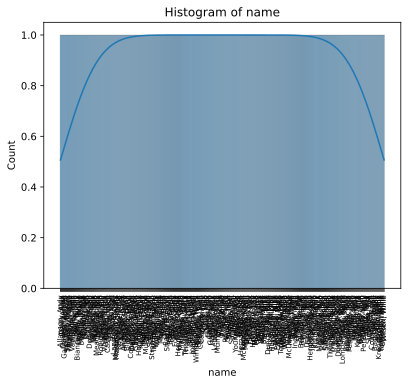

In [160]:
# Player's name
data_exploration(df, 'name')

# Definitely unique and no duplicates, so we can drop this variable.

In [161]:
df['name'].value_counts()

Allanson, Andy       1
Bush, Randy          1
Tettleton, Mickey    1
Scioscia, Mike       1
Schmidt, Mike        1
                    ..
Stubbs, Franklin     1
Rayford, Floyd       1
Lynn, Fred           1
Whitt, Ernie         1
Wilson, Willie       1
Name: name, Length: 322, dtype: int64

Counts and percentages of unique values in team:

              Count  Percentage
NewYork          24    7.453416
Chicago          24    7.453416
Baltimore        15    4.658385
Montreal         14    4.347826
Milwaukee        14    4.347826
KansasCity       14    4.347826
SanFrancisco     14    4.347826
LosAngeles       14    4.347826
Minneapolis      13    4.037267
Texas            13    4.037267
California       13    4.037267
SanDiego         13    4.037267
Cincinnati       12    3.726708
Cleveland        12    3.726708
Detroit          12    3.726708
Oakland          12    3.726708
Seattle          12    3.726708
Philadelphia     12    3.726708
Houston          11    3.416149
Pittsburgh       11    3.416149
StLouis          11    3.416149
Atlanta          11    3.416149
Toronto          11    3.416149
Boston           10    3.105590


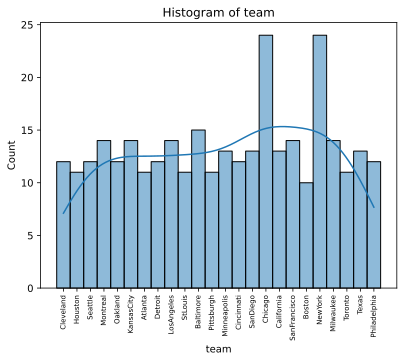

In [162]:
# Team at the end of 1986
data_exploration(df, 'team')

# Most players come from New York or Chicago; most likely because they account for 2 team each
# New York = Yankees (AL) and Mets (NL)
# Chicago = White Sox (AL) and Cubs (NL)
# The data set only includes the city not the name of the Team.
# City names are spelled consistently with no variations, so we will not have to worry about standardizing city names.

Counts and percentages of unique values in league:

          Count  Percentage
American    175   54.347826
National    147   45.652174


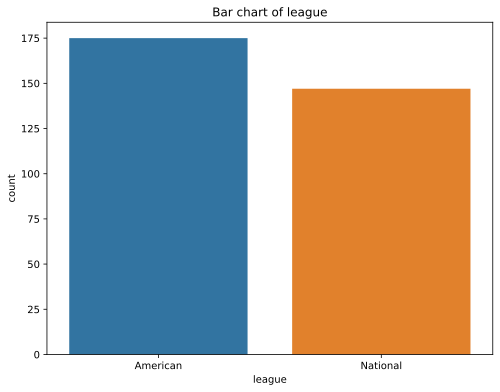

In [163]:
# League at the end of 1986
data_exploration(df, 'league')

# Most of the players play in the AL accounting for 54% (NL = 46%); the data is imbalanced.
# We can use binary encoding here.

Counts and percentages of unique values in division:

      Count  Percentage
West    165   51.242236
East    157   48.757764


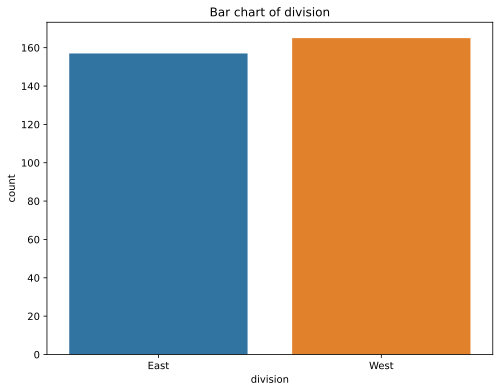

In [164]:
# Division at the end of 1986
data_exploration(df, 'division')

# Most of the players play in th west division accounting for 51% (49% in East); there is a slight imbalance by about 2%.
# We can use binary encoding here.

Counts and percentages of unique values in position:

    Count  Percentage
C      40   12.422360
3B     32    9.937888
1B     31    9.627329
2B     31    9.627329
OF     30    9.316770
SS     30    9.316770
CF     26    8.074534
RF     26    8.074534
LF     25    7.763975
DH     16    4.968944
UT     14    4.347826
O1      4    1.242236
3S      3    0.931677
OS      2    0.621118
DO      2    0.621118
32      1    0.310559
S3      1    0.310559
1O      1    0.310559
CS      1    0.310559
OD      1    0.310559
CD      1    0.310559
3O      1    0.310559
23      1    0.310559
2S      1    0.310559
13      1    0.310559


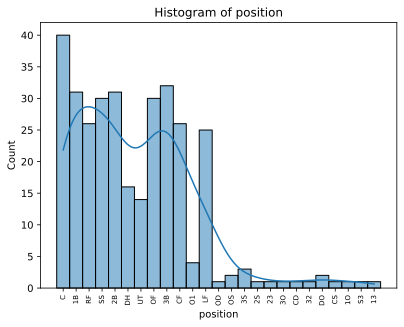

In [165]:
data_exploration(df, 'position')

# After "UT," there are some odd positions abbreviations. We will either have to look these players up to verify/update their position played in 1986.
# We might be able to do some encoding by position number.

Let's a take a closer look those low-count positions.

In [166]:
def filter_by_value(df, column, value):
    """
    Filter a pandas DataFrame by a given column and value.

    Args:
        df (pandas.DataFrame): The DataFrame to filter.
        column (str): The name of the column to filter.
        value: The value to match in the specified column.

    Returns:
        pandas.DataFrame: A new DataFrame containing only the rows where the specified column matches the specified value.
    """
    filtered_df = df[df[column] == value]
    return filtered_df

In [167]:
filter_by_value(df, 'position', 'O1')

# Bonilla, Bobby	 = 1B, CF, LF, RF  https://www.baseball-almanac.com/players/player.php?p=bonilbo01
# Martinez, Carmelo = 1B, 3B, LF  https://www.baseball-almanac.com/players/player.php?p=martica01
# Matuszek, Len = 1B, LF, RF  https://www.baseball-almanac.com/players/player.php?p=matusle01
# Diaz, Mike = 1B, 3B, C, LF, RF  https://www.baseball-almanac.com/players/player.php?p=diazmi01
# Each player had the highest number of outs as an Outfielder and 1B
#'O1' = Might stand for Outfielder + 1B

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
21,"Bonilla, Bobby",Chicago,426,109,3,55,43,62,1,426,109,3,55,43,62,American,West,O1,361,22,2,115.0,4.744932
56,"Martinez, Carmelo",SanDiego,244,58,9,28,25,35,4,1335,333,49,164,179,194,National,West,O1,142,14,2,340.0,5.828946
193,"Matuszek, Len",LosAngeles,199,52,9,26,28,21,6,805,191,30,113,119,87,National,West,O1,235,22,5,265.0,5.579730
205,"Diaz, Mike",Pittsburgh,209,56,12,22,36,19,2,216,58,12,24,37,19,National,East,O1,201,6,3,90.0,4.499810


In [168]:
filter_by_value(df, 'position', '3S')
#Speier, Chris = 2B, 3B, SS  https://www.baseball-almanac.com/players/player.php?p=speiech01
#Anderson, Dave = 2B, 3B, SS  https://www.baseball-almanac.com/players/player.php?p=anderda02
#Johnson, Howard = 3B, SS, LF  https://www.baseball-almanac.com/players/player.php?p=johnsho01
#'3S' = might stand for 3B + SS

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
61,"Speier, Chris",Chicago,155,44,6,21,23,15,16,6631,1634,98,698,661,777,National,East,3S,53,88,3,275.0,5.616771
63,"Anderson, Dave",LosAngeles,216,53,1,31,15,22,4,926,210,9,118,69,114,National,West,3S,73,152,11,225.0,5.416100
131,"Johnson, Howard",NewYork,220,54,10,30,39,31,5,1185,299,40,145,154,128,National,East,3S,50,136,20,297.5,5.695414


In [169]:
filter_by_value(df, 'position', 'OS')
# Snyder, Cory = 3B, LF, RF, SS  https://www.baseball-almanac.com/players/player.php?p=snydeco02
# Mitchell, Kevin	= 1B, 3B, CF, LF, RF, SS  https://www.baseball-almanac.com/players/player.php?p=mitchke01
# Both players had the highest outs as an Outfielder for their teams in 1986
#'OS' might stand for Outfielder + SS

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
60,"Snyder, Cory",Cleveland,416,113,24,58,69,16,1,416,113,24,58,69,16,American,East,OS,203,70,10,90.0,4.499810
183,"Mitchell, Kevin",NewYork,328,91,12,51,43,33,2,342,94,12,51,44,33,National,East,OS,145,59,8,125.0,4.828314


In [170]:
filter_by_value(df, 'position', 'DO')
# Dwyer, Jim = 1B, LF, RF  https://www.baseball-almanac.com/players/player.php?p=dwyerji01
# Leach, Rick = 1B, LF, RF https://www.baseball-almanac.com/players/player.php?p=leachri01
# "DO" might stand for DH + Outfielder
# Both players had high OBP and high SLG for their teams in 1986

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
146,"Dwyer, Jim",Baltimore,160,39,8,18,31,22,14,2128,543,56,304,268,298,American,East,DO,33,3,0,275.0,5.616771
255,"Leach, Rick",Toronto,246,76,5,35,39,13,6,912,234,12,102,96,80,American,East,DO,44,0,1,250.0,5.521461


In [171]:
filter_by_value(df, 'position', '32')
# Iorg, Garth = 2B, 3B, SS  https://www.baseball-almanac.com/players/player.php?p=iorgga01
# "32" might stand for 3B and 2B
# Most outs as 3B for Toronto

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
119,"Iorg, Garth",Toronto,327,85,3,30,44,20,8,2140,568,16,216,208,93,American,East,32,91,185,12,362.5,5.893024


In [172]:
filter_by_value(df, 'position', 'S3')
# Ramirez, Rafael = 3B, LF, RF, SS  https://www.baseball-almanac.com/players/player.php?p=ramirra01
# "S3" might stand for SS + 3B
# Most outs as SS for Atlanta

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
260,"Ramirez, Rafael",Atlanta,496,119,8,57,33,21,7,3358,882,36,365,280,165,National,West,S3,155,371,29,875.0,6.774224


In [173]:
filter_by_value(df, 'position', '1O')
# Aldrete, Mike	= 1B, LF, RF  https://www.baseball-almanac.com/players/player.php?p=aldremi01
# "1O" stands for 1B + Outfielder
# Had the highest outs as 1B for San Francisco

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
201,"Aldrete, Mike",SanFrancisco,216,54,2,27,25,33,1,216,54,2,27,25,33,National,West,1O,317,36,1,75.0,4.317488


In [174]:
filter_by_value(df, 'position', 'CS')
# Quirk, Jamie = 1B, 3B, C, LF  https://www.baseball-almanac.com/players/player.php?p=quirkja01
# "CS" = could stand for Catcher + ?
# Had Highest number of outs as a Catcher for Kansas City; 2nd highest was a 3B... should this be "C3" instead?

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
160,"Quirk, Jamie",KansasCity,219,47,8,24,26,17,12,1188,286,23,100,125,63,American,West,CS,260,58,4,NaN,NaN


In [175]:
filter_by_value(df, 'position', 'OD')
# Castillo, Carmen = RF  https://www.baseball-almanac.com/players/player.php?p=castica01
# Had high OBP and high SLG in Cleveland in 1986
# "OD" could stand for Outfielder + DH

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
47,"Castillo, Carmen",Cleveland,205,57,8,34,32,9,5,756,192,32,117,107,51,American,East,OD,58,4,4,247.5,5.511411


In [176]:
filter_by_value(df, 'position', 'CD')
# Porter, Darrell	= C  https://www.baseball-almanac.com/players/player.php?p=porteda02
# Had high OBP and SLG for Texas
# "CD" could stand for Catcher + DH

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
88,"Porter, Darrell",Texas,155,41,12,21,29,22,16,5409,1338,181,746,805,875,American,West,CD,165,9,1,260.0,5.560682


In [177]:
filter_by_value(df, 'position', '3O')
# Lopes, Davey = 3B, CF, LF  https://www.baseball-almanac.com/players/player.php?p=lopesda01
# Had the higest number of outs as 3B for Chicago
# "3O" could stand for 3B + Outfielder

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
81,"Lopes, Davey",Chicago,255,70,7,49,35,43,15,6311,1661,154,1019,608,820,National,East,3O,51,54,8,450.0,6.109248


In [178]:
filter_by_value(df, 'position', '23')
# Hill, Donnie = 2B, 3B, SS  https://www.baseball-almanac.com/players/player.php?p=hilldo01
# Had the highest outs as a 2B for Oakland in 1986
# "23" probably stands for 2B + 3B

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
79,"Hill, Donnie",Oakland,339,96,4,37,29,23,4,1064,290,11,123,108,55,American,West,23,104,213,9,275.0,5.616771


In [179]:
filter_by_value(df, 'position', '2S')
# Wilkerson, Curt	= 2B, SS  https://www.baseball-almanac.com/players/player.php?p=wilkecu01
# Had the highest number of outs as 2B for Texas
# "2S" probably stands for 2B + SS

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
62,"Wilkerson, Curt",Texas,236,56,0,27,15,11,4,1115,270,1,116,64,57,American,West,2S,125,199,13,230.0,5.438079


In [180]:
filter_by_value(df, 'position', '13')
# Krenchicki, Wayne	= 1B, 2B, 3B, LF  https://www.baseball-almanac.com/players/player.php?p=krencwa01
# Had the highest number of outs as a 1B and 3B
# "13" probably stands for 1B + 3B

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
316,"Krenchicki, Wayne",Montreal,221,53,2,21,23,22,8,1063,283,15,107,124,106,National,East,13,325,58,6,NaN,NaN


After looking these over, these folks played multiple positions, but abbreviation stands for the positions with top number of outs. Those with D in the abbreviation have high OBP and SLG stats. The one that doesn't make sense is  Quirk, Jamie as "CS." Not sure what the "S" in this abbreviation stands for. Why isn't it "C3" instead? Could this an error? For this variable, would it make sense to group those with counts under 10?

### Explore Interval Variables
Perform data exploration on the interval variables of the DMABASE dataset

Mean of no_atbat: 390.07
Standard deviation of no_atbat: 143.60
Number of outliers in no_atbat: 0
Outliers values:
[]


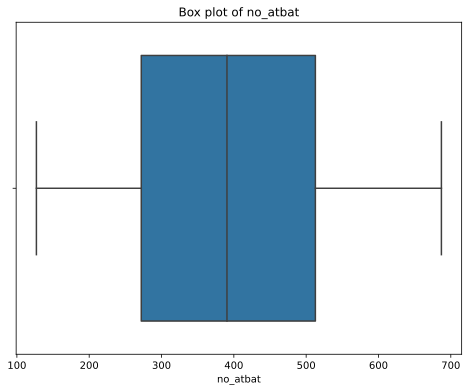

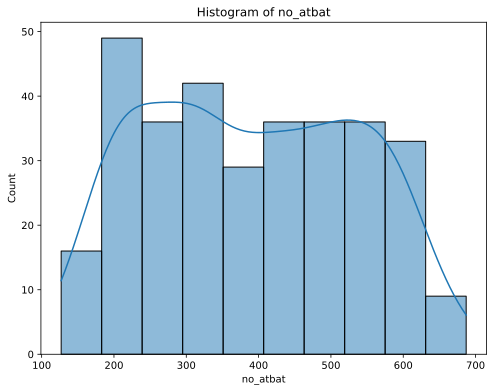

In [181]:
# Times at Bat in 1986
data_exploration(df, 'no_atbat')

# Most at bats fell between about 200-600 in 1986.
# MIN = 127
# MAX = 687
# No ouliers
# Almost normally distributed

Mean of no_hits: 103.40
Standard deviation of no_hits: 44.18
Number of outliers in no_hits: 0
Outliers values:
[]


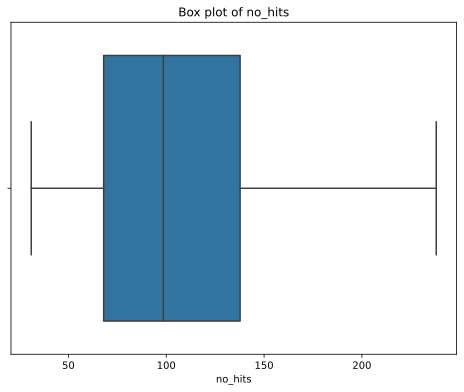

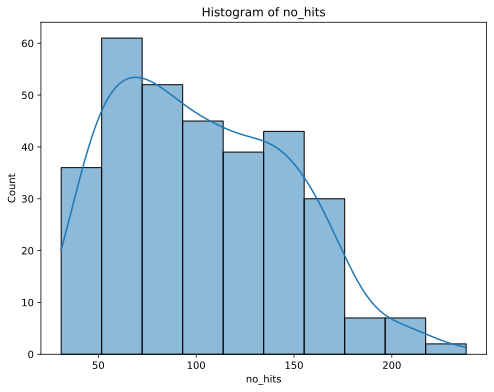

In [182]:
# Hits in 1986
data_exploration(df, 'no_hits')

# For 1986, the number of hits fell between 50-150
# Data is left (positively) skewed, so we may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data.
# No outliers
# MIN = 31
# MAX = 238

Mean of no_home: 11.10
Standard deviation of no_home: 8.70
Number of outliers in no_home: 3
Outliers values:
[35 40 37]


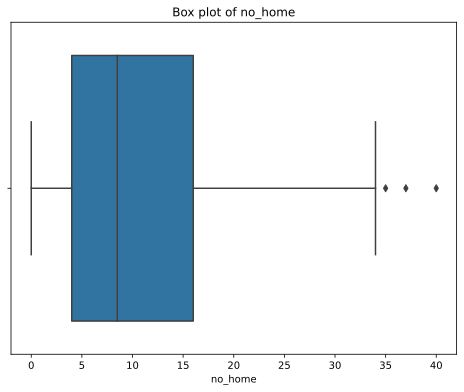

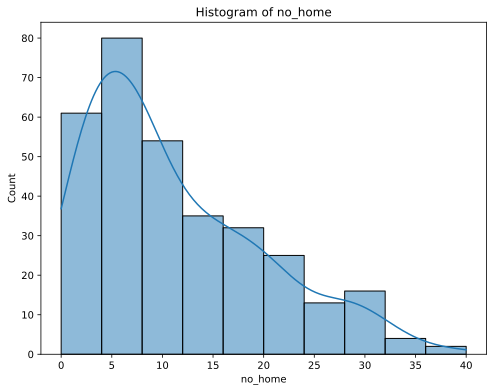

In [183]:
# Home Runs in 1986
data_exploration(df, 'no_home') 

# In 1986, total home runs fell between 0-20;
# Data is positively skewed, and there are 3 outliers = 35, 37, 40
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 0
# MAX = 40

Mean of no_runs: 52.22
Standard deviation of no_runs: 25.06
Number of outliers in no_runs: 1
Outliers values:
[130]


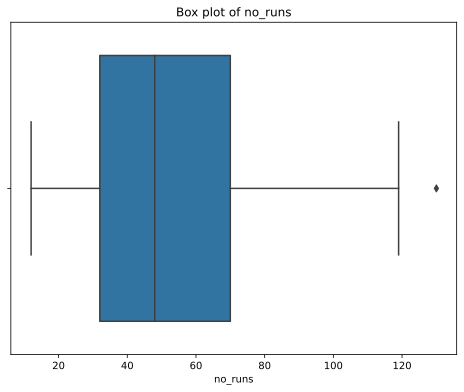

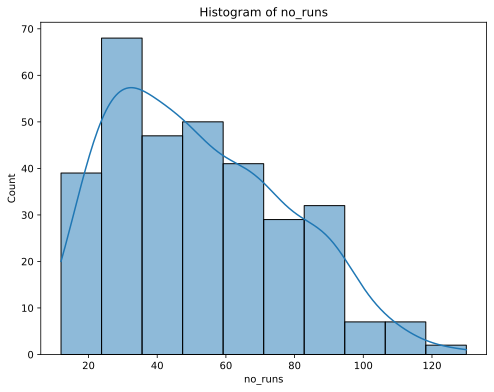

In [184]:
# Runs in 1986
data_exploration(df, 'no_runs')

# In 1986, most runs fell between 20-80 total runs.
# Data is positively skewed with 1 outlier = 130
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 12
# MAX = 130

Mean of no_rbi: 49.37
Standard deviation of no_rbi: 25.50
Number of outliers in no_rbi: 1
Outliers values:
[121]


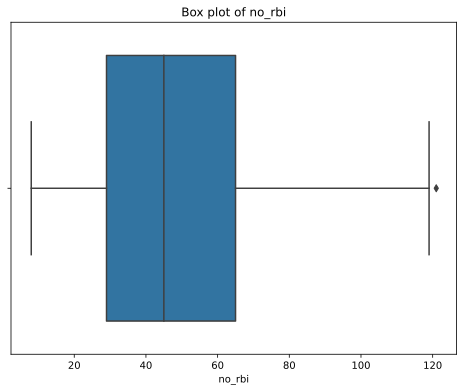

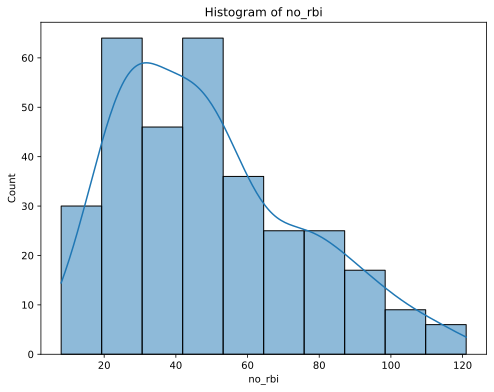

In [185]:
# RBIs in 1986
data_exploration(df, 'no_rbi')

# In 1986, most feel between 20-80 RBIs
# Data is positively skewed with 1 outlier = 121
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 8
# MAX = 121

Mean of no_bb: 39.86
Standard deviation of no_bb: 21.10
Number of outliers in no_bb: 1
Outliers values:
[105]


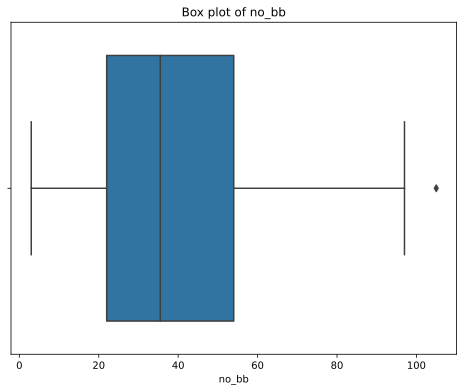

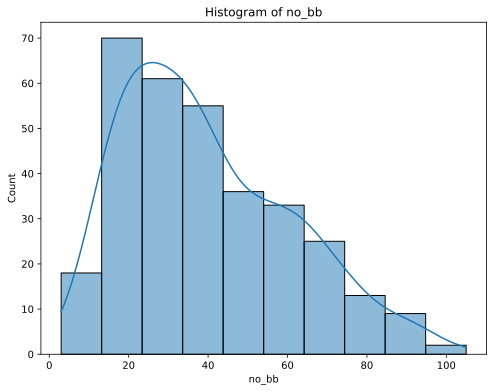

In [186]:
# Walks in 1986
data_exploration(df, 'no_bb')

# Most fell between 20-60 total walks in 1986
# Data is positively skewed with 1 outlier = 105
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 3
# MAX = 105

Mean of yr_major: 7.68
Standard deviation of yr_major: 4.97
Number of outliers in yr_major: 2
Outliers values:
[24 23]


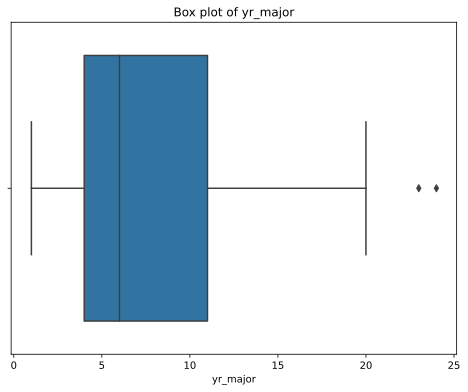

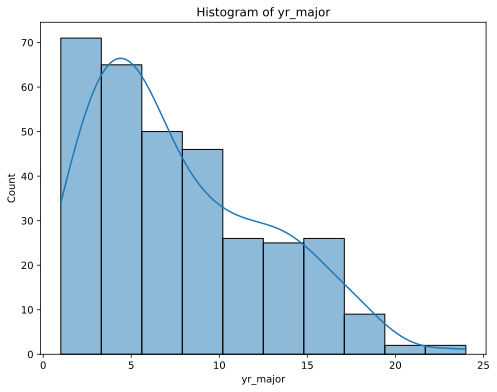

In [187]:
# Years in the Major Leagues
data_exploration(df, 'yr_major')

# MOst played between 0-15 years
# Data is positively skewed with 2 outliers = 23, 24
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 1
# MAX = 24

Mean of cr_atbat: 2763.08
Standard deviation of cr_atbat: 2328.48
Number of outliers in cr_atbat: 3
Outliers values:
[14053  9528  9778]


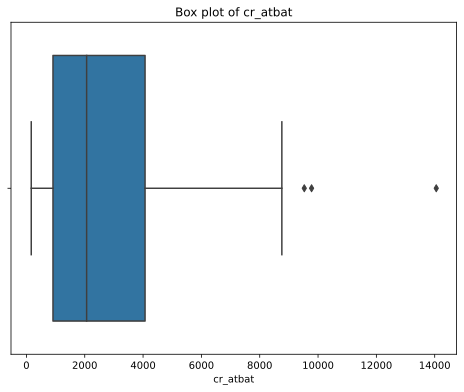

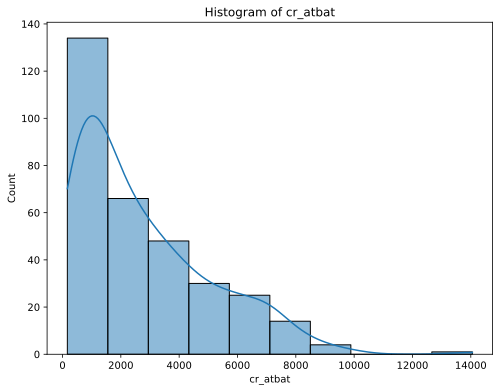

In [188]:
# Career times at bat
data_exploration(df, 'cr_atbat')

# Most players fell between 0-4000 career at-bats
# Data is positively skewed with 3 outliers = 9528, 9778, 14053
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 166
# MAX = 14053

Mean of cr_hits: 747.69
Standard deviation of cr_hits: 654.79
Number of outliers in cr_hits: 6
Outliers values:
[2464 4256 2510 2583 2732 2402]


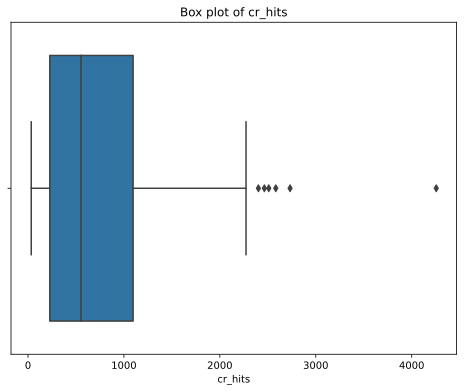

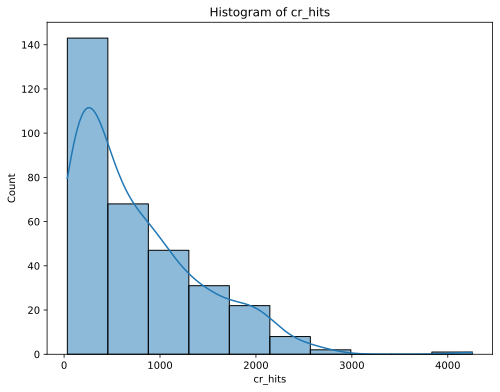

In [189]:
# Career Hits
data_exploration(df, 'cr_hits')

# Most players fell between 0 and 1000+ career hits
# Data is positively skewed with 6 outliers = [2464 4256 2510 2583 2732 2402]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 34
# MAX = 4256

Mean of cr_home: 74.09
Standard deviation of cr_home: 90.07
Number of outliers in cr_home: 32
Outliers values:
[225 253 224 215 235 235 281 242 315 221 347 291 442 266 247 305 275 241
 271 348 259 231 384 268 351 495 312 548 271 224 379 242]


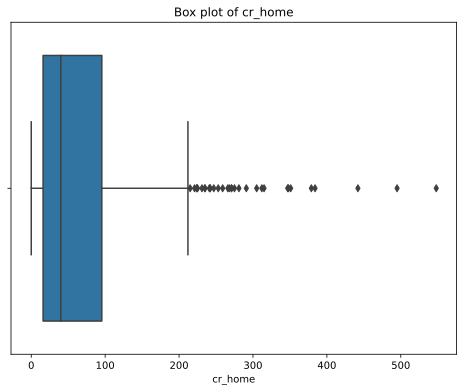

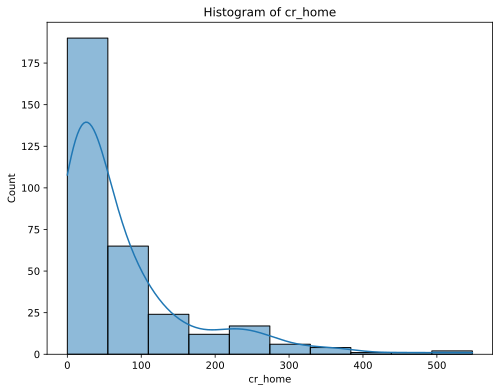

In [190]:
# Career Home Runs
data_exploration(df, 'cr_home')

# Most players fell between 0 and 100 career homers
# Data is positively skewed
# 32 outliers = [225 253 224 215 235 235 281 242 315 221 347 291 442 266 247 305 275 241 271 348 259 231 384 268 351 495 312 548 271 224 379 242]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 0
# MAX = 548

Mean of cr_runs: 374.29
Standard deviation of cr_runs: 336.43
Number of outliers in cr_runs: 4
Outliers values:
[1347 2165 1509 1272]


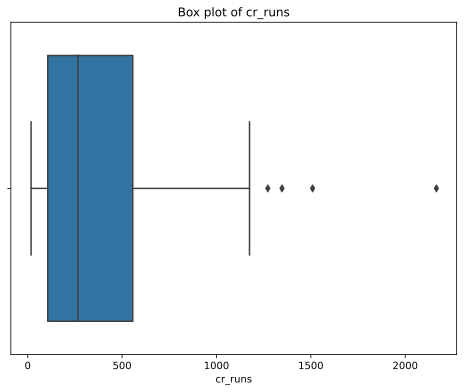

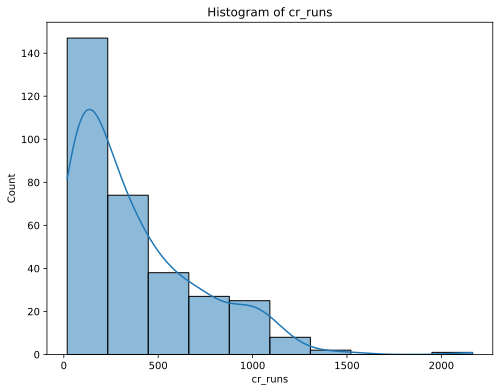

In [191]:
# Career Runs
data_exploration(df, 'cr_runs')

# Most players fell between 0 and roughly over 500 career runs
# Data is positively skewed with 4 outliers = [1347 2165 1509 1272]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 18
# MAX = 2165

Mean of cr_rbi: 347.61
Standard deviation of cr_rbi: 338.79
Number of outliers in cr_rbi: 23
Outliers values:
[1072 1089 1013 1179 1152 1210 1093 1234 1015 1050 1239 1067 1267 1088
 1032 1289 1392 1314 1128 1659 1299 1652 1348]


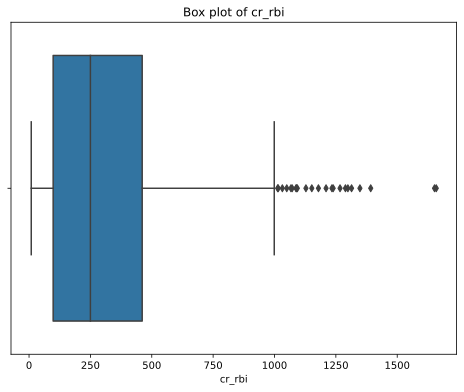

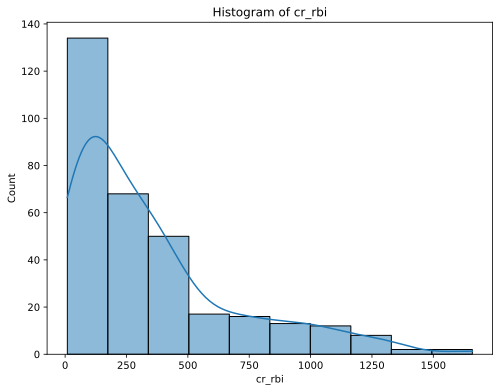

In [192]:
# Career RBIs
data_exploration(df, 'cr_rbi')

# Most players fell between 0 and 500 career RBIs
# Data is positively skewed with 23 outliers = [1072 1089 1013 1179 1152 1210 1093 1234 1015 1050 1239 1067 1267 1088 1032 1289 1392 1314 1128 1659 1299 1652 1348]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 9
# MAX = 1659

Mean of cr_bb: 273.39
Standard deviation of cr_bb: 273.63
Number of outliers in cr_bb: 18
Outliers values:
[ 866 1087 1380  989  820  875  921 1057  854  917 1354 1566  990 1342
 1153  925  819  875]


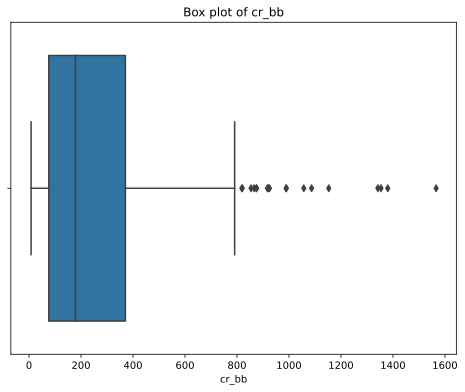

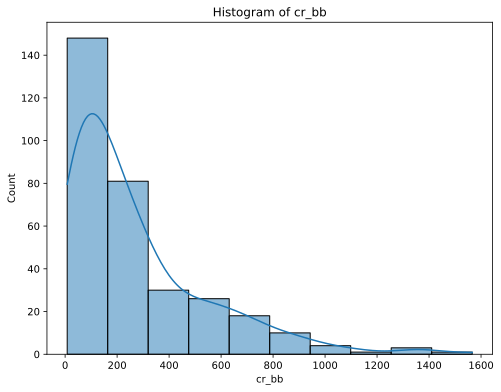

In [193]:
# Career Walks
data_exploration(df, 'cr_bb')

# Most players fell between 0 and 400 career walks
# Data is positively skewed with 18 outliers = [ 866 1087 1380  989  820  875  921 1057  854  917 1354 1566  990 1342 1153  925  819  875]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 8
# MAX = 1566

Mean of no_outs: 288.99
Standard deviation of no_outs: 280.66
Number of outliers in no_outs: 36
Outliers values:
[ 880  805  912  812 1067  732 1378  697  808 1377 1045  709  726  869
 1253  670  885  686 1199 1218 1231  756  682 1224  846  659  866 1236
 1320 1160  692  810 1182  942 1222 1314]


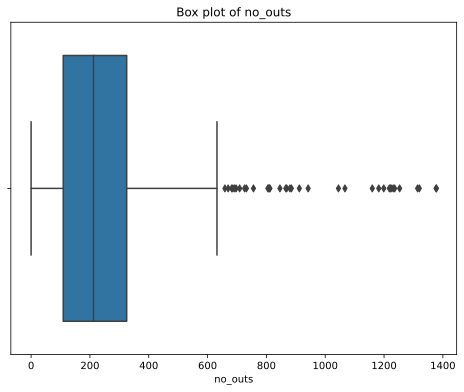

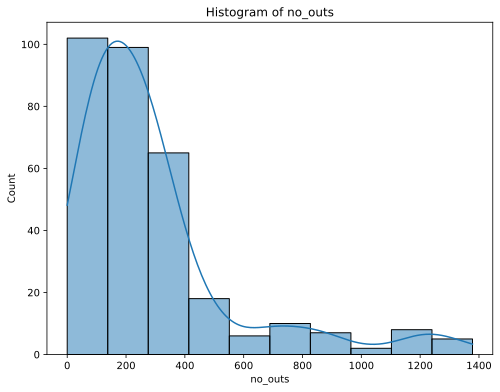

In [194]:
# Put Outs in 1986
data_exploration(df, 'no_outs')

# Most players were thrown out roughly between 0 and 400 times in 1986
# Data is positively skewed
# 36 outlier = [ 880  805  912  812 1067  732 1378  697  808 1377 1045  709  726  869 1253  670  885  686 1199 1218 1231  756  682 1224  846  659  866 1236 1320 1160  692  810 1182  942 1222 1314]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 0
# MAX = 1378

Mean of no_assts: 106.92
Standard deviation of no_assts: 136.85
Number of outliers in no_assts: 23
Outliers values:
[421 445 482 439 487 415 479 440 444 421 450 459 453 475 492 450 465 406
 407 432 442 445 414]


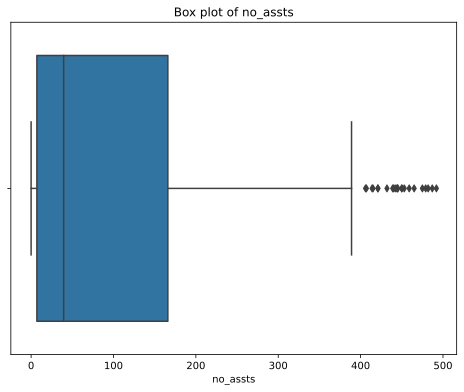

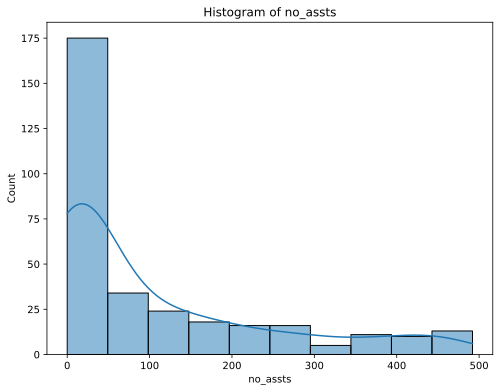

In [195]:
# Assists in 1986
data_exploration(df, 'no_assts')

# In 1986, most players fell roughly between 0 and 200 assists
# Data is positively skewed with 23 outliers = [421 445 482 439 487 415 479 440 444 421 450 459 453 475 492 450 465 406 407 432 442 445 414]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 0
# MAX = 492

Mean of no_error: 8.04
Standard deviation of no_error: 6.37
Number of outliers in no_error: 9
Outliers values:
[25 25 24 26 26 25 25 29 32]


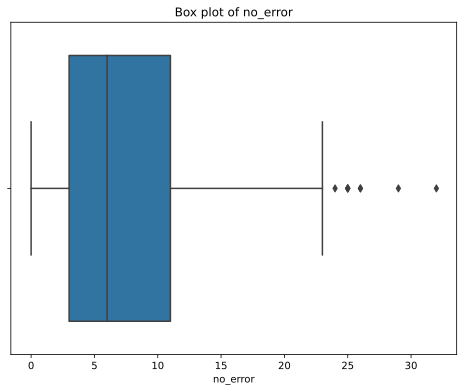

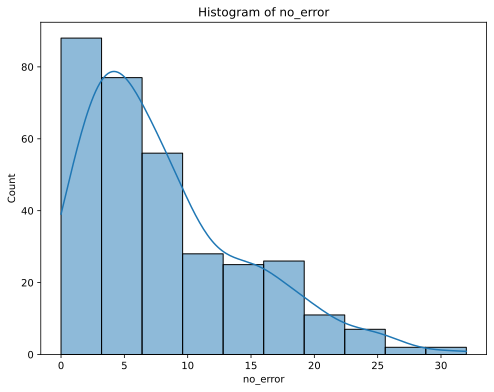

In [196]:
# Errors in 1986
data_exploration(df, 'no_error')

# In 1986, most players fell roughly between 0 and 15 errors
# Data is positively skewed with 9 outliers = [25 25 24 26 26 25 25 29 32]
# We may need to bin the data.
# We may need to use modeling techniques that are not sensitive to skewed data and outliers.
# MIN = 0
# MAX = 32

Mean of salary: 535.93
Standard deviation of salary: 451.12
Number of outliers in salary: 11
Outliers values:
[1975.    1900.    1861.46  2460.    1925.571 2412.5   1800.    2127.333
 1940.    1670.    1600.   ]


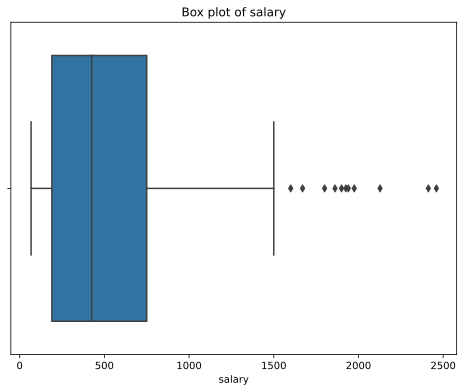

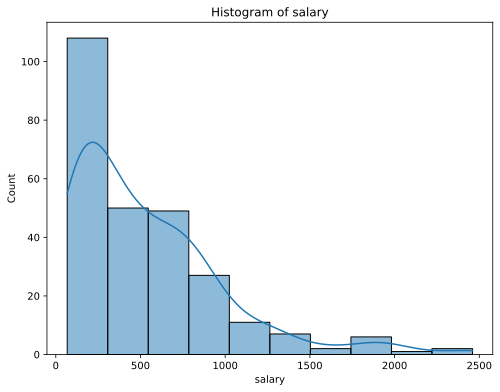

In [197]:
# 1987 Salary in $ Thousands
data_exploration(df, 'salary')

# In 1987, most player salaries fell roughly between $125 and $750 thousand
# Data is positively skewed with 11 outliers = [1975.    1900.    1861.46  2460.    1925.571 2412.5   1800.    2127.333 1940.    1670.    1600.   ]
# MIN = 67.50
# MAX = 2460.00
# We can confirm here that we are predicting for 1987
# We can drop this variable since we have the log of the salary.

Mean of logsalar: 5.93
Standard deviation of logsalar: 0.89
Number of outliers in logsalar: 0
Outliers values:
[]


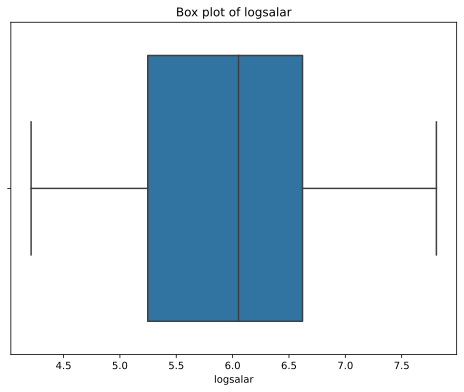

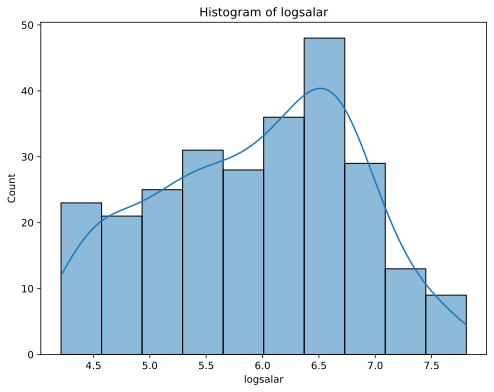

In [198]:
# Log Salary
data_exploration(df, 'logsalar')  # Target Variable

# In 1987, most player log salaries fell roughly between 5.0 and 7.0
# The data is slightly normally distributed with 0 outliers
# MIN = 4.21
# MAX = 7.81

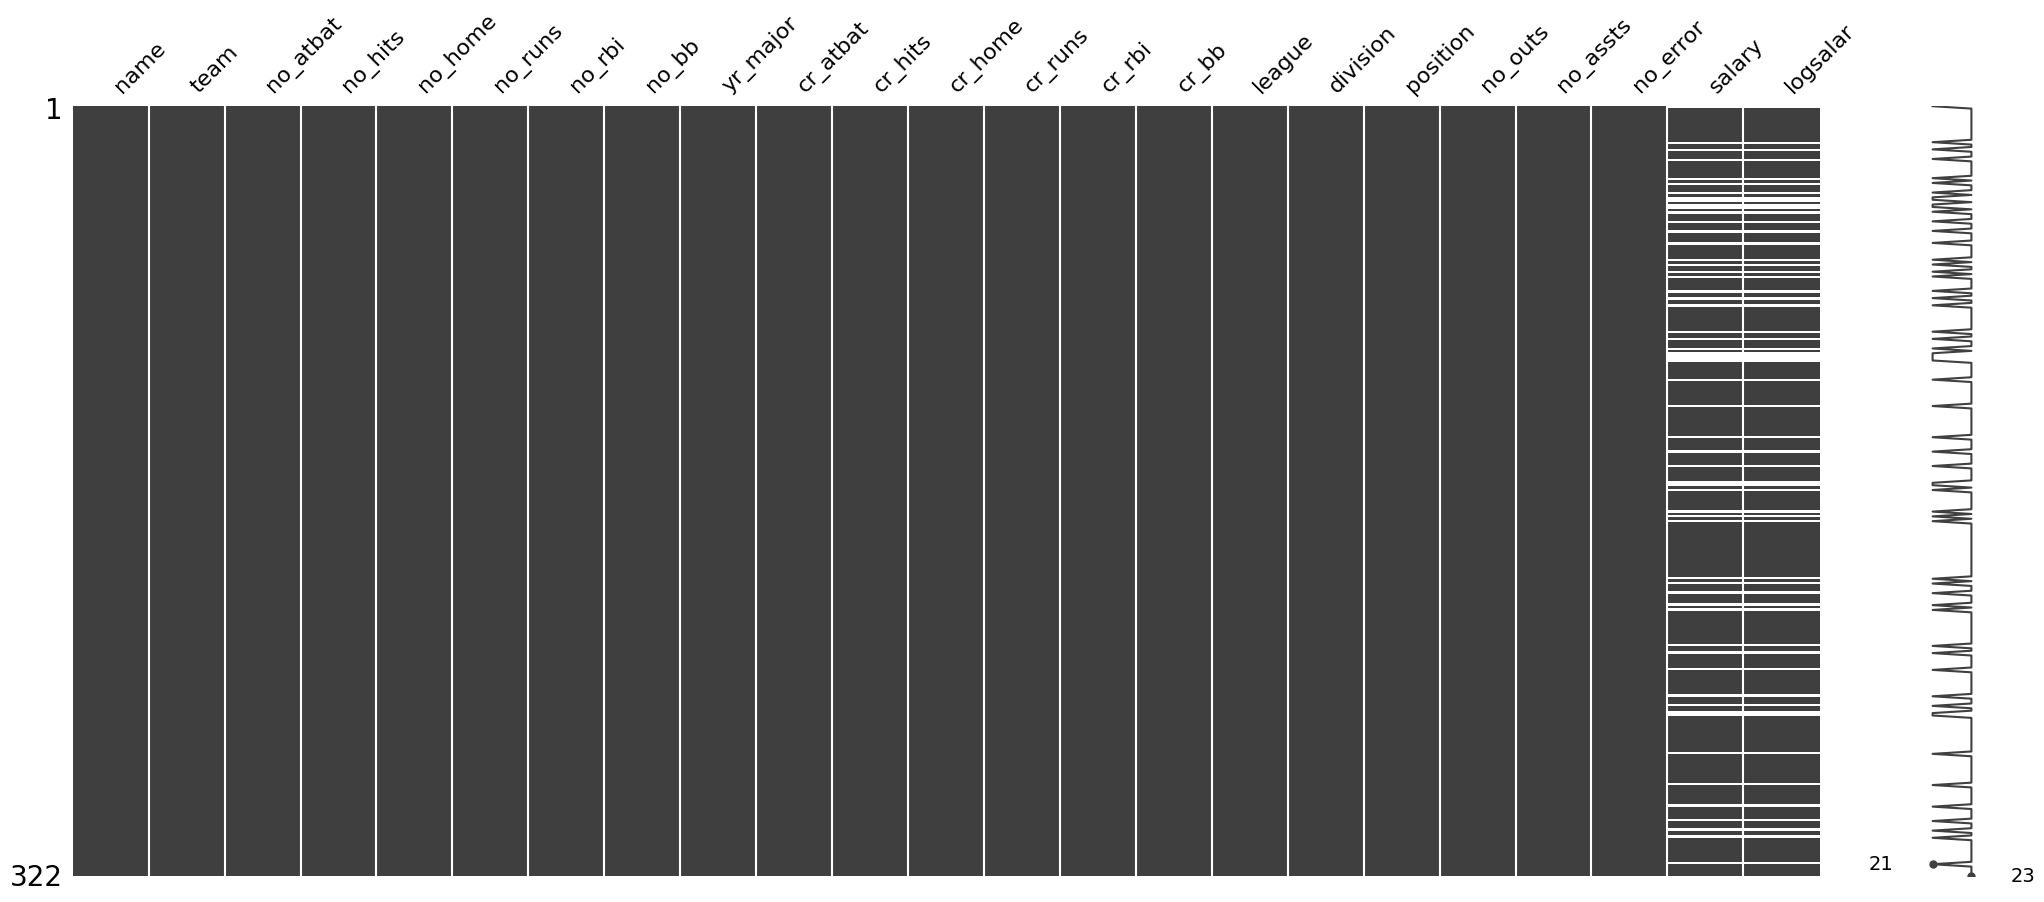

In [199]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(df)
plt.show()

# Since the logsalar is just the log of the salary, we can expect both variables to be missing data from the same records.

### Upon completing the data understanding, here is a our Data Preparation Plan:
1. Because it's a unique variables, drop the player name because its is useless to us.
2. Do some data cleansing with the positions variable; for those odd position abbrevations, perhaps do some position groupings or relabel?
3. If we consider a clustering model, we'll have to normalize the entire dataset.
4. We can drop the salary variable since we have logsalar.
5. We'll have to do input the logsalar variable using random forest imputation.

***Something to keep in mind***:

The Correlations Analysis shows some high correlated variables. This might impact modeling; thus, if we are seeing poor performance during modeling, we may need to address this.

If we use a tree-based model, we won't have to worry about normalizing the data and encoding the categorical variables.

If we use a clustering model, we'll have to normalize the data and encode the categorical variables.

Since the records are small, we may use PCA to reduce the dimensionality of the data.

If the models are overfitting, we may have to resort to label encoding instead of one-hot encoding and do some post-pruning.

## Data Preparation Phase

In [217]:
# Create a copy of the data frame to the data prep
df_input = df.copy()

### Drop Useless Variables

In [218]:
# Name is a unique identifier, and thus, useless for modeling, so we'll drop this variable.
# Since we have logsalar variable (which is the log of the salary column), so we will drop salary as well.
df_input.drop(['name', 'salary'], axis=1, inplace=True)
print(df_input.columns)

Index(['team', 'no_atbat', 'no_hits', 'no_home', 'no_runs', 'no_rbi', 'no_bb',
       'yr_major', 'cr_atbat', 'cr_hits', 'cr_home', 'cr_runs', 'cr_rbi',
       'cr_bb', 'league', 'division', 'position', 'no_outs', 'no_assts',
       'no_error', 'logsalar'],
      dtype='object')


In [219]:
# We are going to combine Team + League + Division to create a new column; this will allow us to separate those cities that have 2 teams
# Also, this will help us prep for encoding this new column as their 1986 ranking
df_input['team_league_division'] = df_input['team'] + '_' + df_input['league'] + '_' + df_input['division']
df_input.head(10)

,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,logsalar,team_league_division
0,Cleveland,293,66,1,30,29,14,1,293,66,1,30,29,14,American,East,C,446,33,20,NaN,Cleveland_American_East
1,Houston,315,81,7,24,38,39,14,3449,835,69,321,414,375,National,West,C,632,43,10,6.163315,Houston_National_West
2,Seattle,479,130,18,66,72,76,3,1624,457,63,224,266,263,American,West,1B,880,82,14,6.173786,Seattle_American_West
3,Montreal,496,141,20,65,78,37,11,5628,1575,225,828,838,354,National,East,RF,200,11,3,6.214608,Montreal_National_East
4,Montreal,321,87,10,39,42,30,2,396,101,12,48,46,33,National,East,1B,805,40,4,4.516339,Montreal_National_East
5,Oakland,594,169,4,74,51,35,11,4408,1133,19,501,336,194,American,West,SS,282,421,25,6.620073,Oakland_American_West
6,Montreal,185,37,1,23,8,21,2,214,42,1,30,9,24,National,East,2B,76,127,7,4.248495,Montreal_National_East
7,KansasCity,298,73,0,24,24,7,3,509,108,0,41,37,12,American,West,SS,121,283,9,4.605170,KansasCity_American_West
8,Atlanta,323,81,6,26,32,8,2,341,86,6,32,34,8,National,West,SS,143,290,19,4.317488,Atlanta_National_West
9,Cleveland,401,92,17,49,66,65,13,5206,1332,253,784,890,866,American,East,DH,0,0,0,7.003065,Cleveland_American_East


In [220]:
# Now that we have our new Team_League_Division column, we can drop League and Division from the dataset.
df_input = df_input.drop(['league', 'division'], axis=1)
df_input.head()

,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,position,no_outs,no_assts,no_error,logsalar,team_league_division
0,Cleveland,293,66,1,30,29,14,1,293,66,1,30,29,14,C,446,33,20,NaN,Cleveland_American_East
1,Houston,315,81,7,24,38,39,14,3449,835,69,321,414,375,C,632,43,10,6.163315,Houston_National_West
2,Seattle,479,130,18,66,72,76,3,1624,457,63,224,266,263,1B,880,82,14,6.173786,Seattle_American_West
3,Montreal,496,141,20,65,78,37,11,5628,1575,225,828,838,354,RF,200,11,3,6.214608,Montreal_National_East
4,Montreal,321,87,10,39,42,30,2,396,101,12,48,46,33,1B,805,40,4,4.516339,Montreal_National_East


### Format Data

In [221]:
# Group positions and do label encoding

# Create a list of the basic positions
basic_positions = ['C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF', 'OF', 'DH', 'UT']

# Map the special positions to their corresponding basic positions
position_mapping = {
    "O1": ["OF", "1B"],
    "3S": ["3B", "SS"],
    "OS": ["OF", "SS"],
    "DO": ["DH", "OF"],
    "32": ["3B", "2B"],
    "S3": ["SS", "3B"],
    "1O": ["1B", "OF"],
    "CS": ["CF", "3B"], # CS is a special case, it actually means CF and 3B based on the research
    "OD": ["OF", "DH"],
    "CD": ["CF", "DH"],
    "3O": ["3B", "OF"],
    "23": ["2B", "3B"],
    "2S": ["2B", "SS"],
    "13": ["1B", "3B"]
}

# Copy the position column
df_input['position_copy'] = df_input['position']

# If the position is a special one, replace it with the first corresponding basic position
def replace_special_positions(pos):
    if pos in position_mapping:
        return position_mapping[pos][0]
    return pos

df_input['position_copy'] = df_input['position_copy'].apply(replace_special_positions)

# Now we can drop the original 'position' column
df_input = df_input.drop('position', axis=1)

# Check to the data ensure groupings are there before label encoding
df_input['position_copy'].value_counts()

C     40
OF    37
3B    37
1B    33
2B    33
SS    31
CF    28
RF    26
LF    25
DH    18
UT    14
Name: position_copy, dtype: int64

In [222]:
# Label encode the positions based on the position numbers in Baseball
# Corresponding baseball position numbers:  https://en.wikipedia.org/wiki/Baseball_positions
df_input['position_copy'].replace(['C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF', 'OF', 'UT', 'DH'], [2,3,4,5,6,7,8,9,10,11,12], inplace = True)
df_input.head(10)

,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,no_outs,no_assts,no_error,logsalar,team_league_division,position_copy
0,Cleveland,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,Cleveland_American_East,2
1,Houston,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315,Houston_National_West,2
2,Seattle,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786,Seattle_American_West,3
3,Montreal,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608,Montreal_National_East,9
4,Montreal,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.516339,Montreal_National_East,3
5,Oakland,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,6.620073,Oakland_American_West,6
6,Montreal,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,4.248495,Montreal_National_East,4
7,KansasCity,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9,4.605170,KansasCity_American_West,6
8,Atlanta,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19,4.317488,Atlanta_National_West,6
9,Cleveland,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,7.003065,Cleveland_American_East,12


In [223]:
# Label encode the Team with their ranking in 1986 using the team_league_division variable
# Rankings:  https://www.baseball-reference.com/leagues/majors/1986-standings.shtml
df_input['team_league_division'].value_counts().sort_index()

Atlanta_National_West         11
Baltimore_American_East       15
Boston_American_East          10
California_American_West      13
Chicago_American_West         13
Chicago_National_East         11
Cincinnati_National_West      12
Cleveland_American_East       12
Detroit_American_East         12
Houston_National_West         11
KansasCity_American_West      14
LosAngeles_National_West      14
Milwaukee_American_East       14
Minneapolis_American_West     13
Montreal_National_East        14
NewYork_American_East         11
NewYork_National_East         13
Oakland_American_West         12
Philadelphia_National_East    12
Pittsburgh_National_East      11
SanDiego_National_West        13
SanFrancisco_National_West    14
Seattle_American_West         12
StLouis_National_East         11
Texas_American_West           13
Toronto_American_East         11
Name: team_league_division, dtype: int64

In [224]:
df_input['team_league_division'].replace(['NewYork_National_East','Houston_National_West','Boston_American_East','California_American_West','NewYork_American_East',
                                          'Texas_American_West','Detroit_American_East','Philadelphia_National_East','Cincinnati_National_West','Toronto_American_East',
                                          'Cleveland_American_East','SanFrancisco_National_West','StLouis_National_East','Montreal_National_East','Milwaukee_American_East',
                                          'KansasCity_American_West','Oakland_American_West','SanDiego_National_West','LosAngeles_National_West','Baltimore_American_East',
                                          'Atlanta_National_West','Chicago_American_West','Minneapolis_American_West','Chicago_National_East','Seattle_American_West',
                                          'Pittsburgh_National_East'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], inplace = True)

# We can now drop team variable since now we no longer need it
df_input = df_input.drop('team', axis=1)

#Check dataset to ensure the rankings were applied
df_input.head(10)

,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,no_outs,no_assts,no_error,logsalar,team_league_division,position_copy
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,11,2
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315,2,2
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786,25,3
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608,14,9
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.516339,14,3
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,6.620073,17,6
6,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,4.248495,14,4
7,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9,4.605170,16,6
8,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19,4.317488,21,6
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,7.003065,11,12


In [225]:
# Lets rename team_league_division as ranking
df_input = df_input.rename(columns={'team_league_division': 'ranking'})
df_input.head(10)

,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,no_outs,no_assts,no_error,logsalar,ranking,position_copy
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,11,2
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315,2,2
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786,25,3
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608,14,9
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.516339,14,3
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,6.620073,17,6
6,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,4.248495,14,4
7,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9,4.605170,16,6
8,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19,4.317488,21,6
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,7.003065,11,12


### Clean Data

#### Imputation with Random Forest

In [209]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [210]:
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [211]:
!pip install missingpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [212]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

from missingpy import MissForest

In [226]:
# Make an instance and perform the imputation
# Use all default values for the imputer
tree_imputer = MissForest()

# Fit the imputer to the data and transform the data
Tree_imputed_df = tree_imputer.fit_transform(df_input)

# The imputed data is returned as a numpy array, so convert it back to a pandas DataFrame
Tree_imputed_df = pd.DataFrame(Tree_imputed_df, columns=df_input.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Iteration: 0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Iteration: 1


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Iteration: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Iteration: 3


In [227]:
# Check the imputed data
metadata(Tree_imputed_df).iloc[16,:]

col_name                     logsalar
data_type                     float64
missing_values                      0
missing_values_percentage         0.0
unique_values                     209
unique_values_percentage        64.91
min                          4.212128
max                          7.807917
std                          0.866472
Name: 16, dtype: object

In [228]:
# check the original data
metadata(df_input).iloc[16,:]

col_name                     logsalar
data_type                     float64
missing_values                     59
missing_values_percentage       18.32
unique_values                     150
unique_values_percentage        46.58
min                          4.212128
max                          7.807917
std                          0.889192
Name: 16, dtype: object

The MissForest has done a good job in imputing the missing values. The imputed values are very close to the actual values.

In [229]:
# save Tree_imputed_df as a csv file called TaskB.csv
Tree_imputed_df.to_csv(file_path + 'TaskB.csv', index = False)